In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Link dataset: https://drive.google.com/drive/folders/1-uudTCIBWxnvdGwataxPGxsrqmiMQ5Tj?usp=share_link

In [2]:
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/Dataset\ Deep \Learning/Tugas-VGG16/

/content/gdrive/MyDrive/Dataset Deep Learning/Tugas-VGG16


In [4]:
%ls

Data-Testing/  Data-Training/


In [5]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Classifier
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [6]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [8]:
# generators
# Initialize Generator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

data_path = "Data-Training/"

train_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [9]:
%ls

Data-Testing/  Data-Training/  Trained-Model/


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='Trained-Model/best_model.h5',
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [11]:
history = model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // train_ds.batch_size,
    validation_data=validation_ds,
    validation_steps=validation_ds.samples // validation_ds.batch_size,
    epochs=10,
    verbose=1,
    callbacks=[checkpoint_callback])

Epoch 1/10
22/22 [==============================] - 446s 19s/step - loss: 527.8201 - accuracy: 0.3285 - val_loss: 1.0623 - val_accuracy: 0.3625
Epoch 2/10
22/22 [==============================] - 32s 1s/step - loss: 1.0939 - accuracy: 0.3910 - val_loss: 1.0382 - val_accuracy: 0.6062
Epoch 3/10
22/22 [==============================] - 22s 1s/step - loss: 1.0681 - accuracy: 0.4186 - val_loss: 0.9548 - val_accuracy: 0.5688
Epoch 4/10
22/22 [==============================] - 23s 1s/step - loss: 1.1523 - accuracy: 0.3445 - val_loss: 1.0592 - val_accuracy: 0.3187
Epoch 5/10
22/22 [==============================] - 20s 874ms/step - loss: 1.0701 - accuracy: 0.3517 - val_loss: 0.9175 - val_accuracy: 0.5750
Epoch 6/10
22/22 [==============================] - 19s 863ms/step - loss: 1.0870 - accuracy: 0.3968 - val_loss: 1.0212 - val_accuracy: 0.3313
Epoch 7/10
22/22 [==============================] - 20s 909ms/step - loss: 1.0050 - accuracy: 0.5145 - val_loss: 1.0137 - val_accuracy: 0.3562
Epoch 8

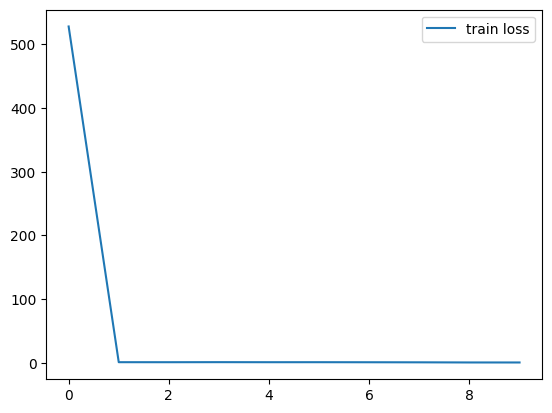

In [12]:
# train loss
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.show()

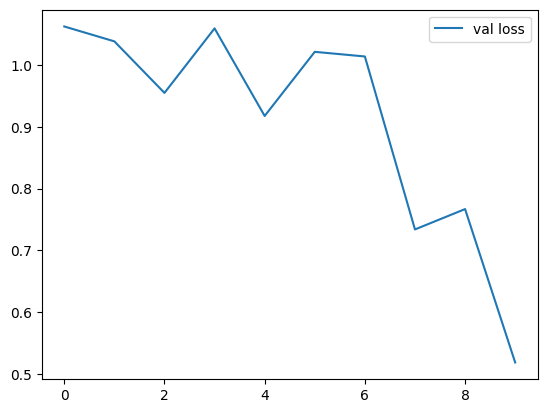

In [13]:
# validation loss
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

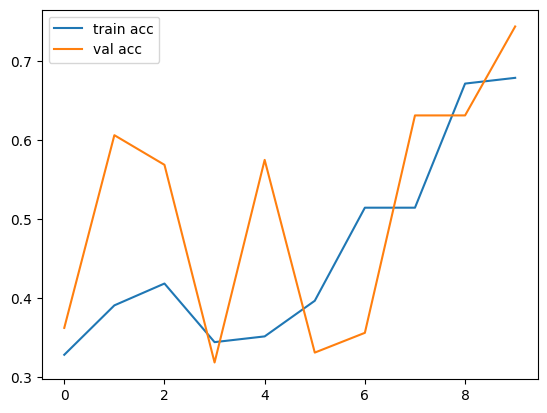

In [14]:
# accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

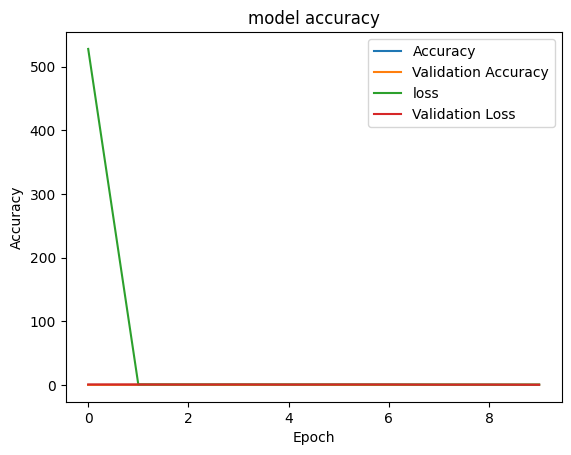

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# Testing
gen = ImageDataGenerator(
    rescale=1.0/255.0,
    samplewise_center=True,
    samplewise_std_normalization=True
)

data_path = "Data-Testing/"

test_ds=gen.flow_from_directory(
    data_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244)
)

Found 903 images belonging to 3 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


29/29 [==============================] - 192s 7s/step - loss: 1.1005 - accuracy: 0.3322
Test Loss: 1.1004806756973267
Test Accuracy: 0.3322259187698364


1/1 [==============================] - 0s 20ms/step
[[0.4746972  0.25012672 0.2751761 ]]
Motor


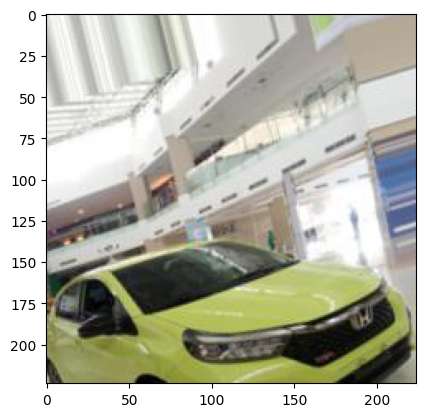

In [ ]:
from PIL import Image

img = Image.open("Data-Testing/cars/augmented_0_28.jpg")
img = img.resize((224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model

output = model.predict(img)
print(output)
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("Motor")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print('Mobil')
else:
    print("Non-Vehicles")

In [ ]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

original_images_dir = "Data-Testing/bikes"
augmented_images_dir = "Data-Testing/new-bikes"

os.makedirs(augmented_images_dir, exist_ok=True)

for filename in os.listdir(original_images_dir):
    img_path = os.path.join(original_images_dir, filename)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    i = 0
    for batch in data_generator.flow(img_array, batch_size=1, save_to_dir=augmented_images_dir,
                                     save_prefix='augmented', save_format='jpg'):
        i += 1
        if i >= 15:
            break
"""
